In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [10]:
ticker = 'INFY.NS'
data = yf.download(ticker, start='2018-04-01', end='2023-03-31')
df = data[['Open', 'High', 'Low', 'Close']].copy()


[*********************100%***********************]  1 of 1 completed


In [11]:
def calculate_bollinger_bands(data, window_size, num_std):
    rolling_mean = df["Close"].rolling(window=window_size).mean()
    rolling_std = df["Close"].rolling(window=window_size).std()
    upper_band = rolling_mean + num_std * rolling_std
    lower_band = rolling_mean - num_std * rolling_std
    print(data.tail())
    df['Close'].plot(label = 'CLOSE PRICES', color = 'skyblue')
    upper_band.plot(label = 'UPPER Band', linestyle = '--', linewidth = 1, color = 'black')
    rolling_mean.plot(label = 'MIDDLE Band', linestyle = '--', linewidth = 1.2, color = 'grey')
    lower_band.plot(label = 'LOWER Band', linestyle = '--', linewidth = 1, color = 'black')
    plt.legend(loc = 'upper left')
    plt.title('data BOLLINGER BANDS')
    plt.show()
    return rolling_mean, upper_band, lower_band



                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-03-23  1383.949951  1383.949951  1370.000000  1374.550049  1338.315186   
2023-03-24  1388.000000  1398.949951  1377.500000  1380.650024  1344.254395   
2023-03-27  1386.250000  1395.750000  1374.099976  1388.949951  1352.335449   
2023-03-28  1392.099976  1398.000000  1375.849976  1377.599976  1341.284668   
2023-03-29  1379.000000  1389.900024  1364.550049  1383.550049  1347.077881   

             Volume  
Date                 
2023-03-23  7607718  
2023-03-24  7559127  
2023-03-27  4170193  
2023-03-28  6633366  
2023-03-29  8813966  


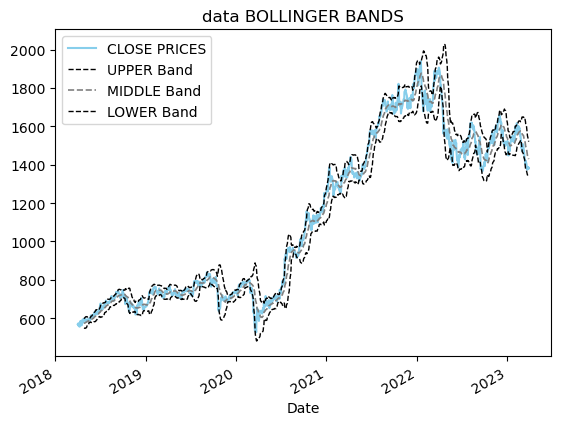

In [12]:
window_size = 20
num_std = 2
rolling_mean, upper_band, lower_band = calculate_bollinger_bands(data, window_size, num_std)


In [13]:
def calculate_rsi(data, window_size):
    price_diff = data.diff()
    up_prices = price_diff.where(price_diff > 0, 0)
    down_prices = -price_diff.where(price_diff < 0, 0)

    avg_gain = up_prices.rolling(window=window_size).mean()
    avg_loss = down_prices.rolling(window=window_size).mean()

    relative_strength = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + relative_strength))
    return rsi

# Example usage:
# Assuming 'data' is a pandas Series or DataFrame column containing stock prices


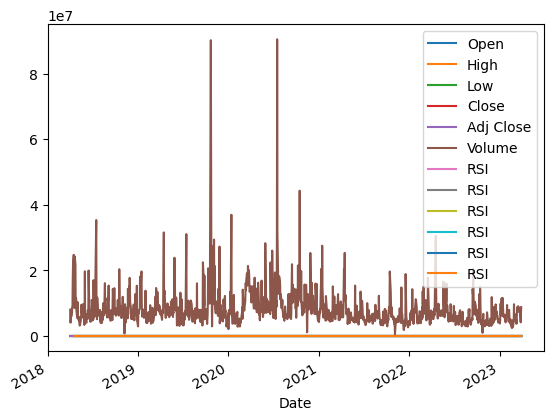

In [14]:
window_size = 14
rsi = calculate_rsi(data, window_size)

# Plotting RSI
data.plot(label='Stock Price')
plt.plot(rsi, label='RSI')
plt.legend()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24812\592345180.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  buy_signal = (data < lower_band) & (rsi < 30)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24812\592345180.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  sell_signal = (data > upper_band) & (rsi > 70)


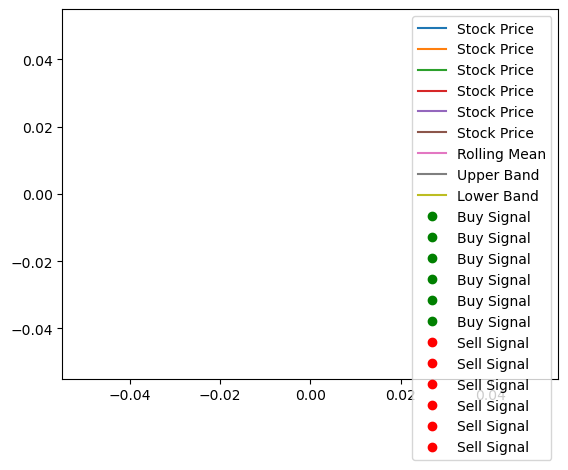

In [7]:
# Example trading signal generation
buy_signal = (data < lower_band) & (rsi < 30)
sell_signal = (data > upper_band) & (rsi > 70)

# Generate trading positions based on signals (1 for buy, -1 for sell, 0 for hold)
positions = np.where(buy_signal, 1, np.where(sell_signal, -1, 0))

# Plotting positions
plt.plot(data, label='Stock Price')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(upper_band, label='Upper Band')
plt.plot(lower_band, label='Lower Band')
plt.plot(data[positions == 1], 'go', label='Buy Signal')
plt.plot(data[positions == -1], 'ro', label='Sell Signal')
plt.legend()
plt.show()

ValueError: x and y must be the same size

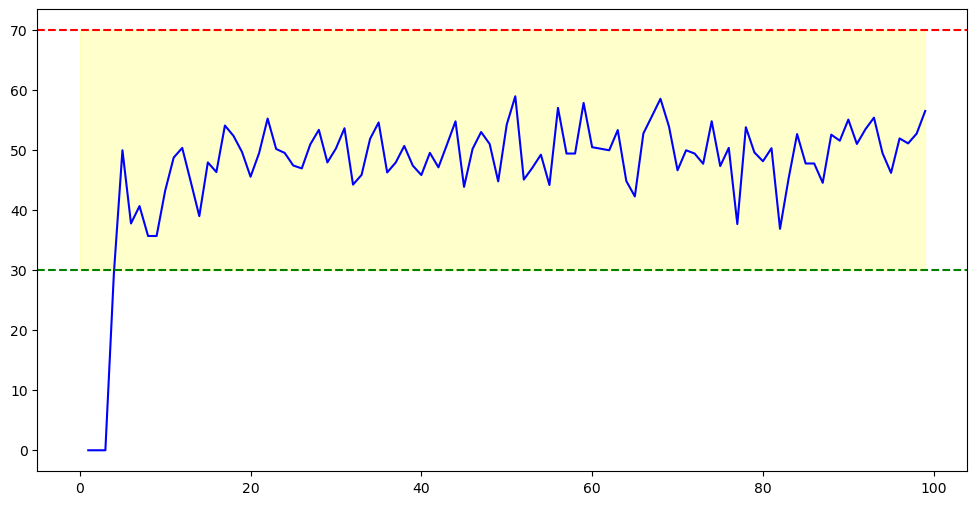

In [16]:
def calculate_rsi(data, window=14):
    delta = data.diff().dropna()

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    relative_strength = avg_gain / avg_loss
    rsi = 100.0 - (100.0 / (1.0 + relative_strength))

    return rsi

# Generate random data (replace this with your financial data)
np.random.seed(42)
num_periods = 100
price_data = np.random.randint(80, 120, num_periods)

# Create a DataFrame with the random price data
df = pd.DataFrame({'Close': price_data})

# Calculate RSI using the close price
rsi_period = 14
df['RSI'] = calculate_rsi(df['Close'], rsi_period)

# Define RSI thresholds for generating signals
rsi_overbought = 70
rsi_oversold = 30

# Generate trading signals (Buy: RSI < 30, Sell: RSI > 70)
df['Signal'] = np.where(df['RSI'] < rsi_oversold, 1, np.where(df['RSI'] > rsi_overbought, -1, 0))

# Plot the RSI and buy/sell signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RSI'], label='RSI', color='blue')
plt.axhline(y=rsi_overbought, color='r', linestyle='--', label='Overbought')
plt.axhline(y=rsi_oversold, color='g', linestyle='--', label='Oversold')
plt.fill_between(df.index, rsi_oversold, rsi_overbought, color='yellow', alpha=0.2, label='Neutral Zone')
plt.scatter(df.index, df['Close'][df['Signal'] == 1], marker='^', color='g', label='Buy Signal', lw=0)
plt.scatter(df.index, df['Close'][df['Signal'] == -1], marker='v', color='r', label='Sell Signal', lw=0)
plt.legend()
plt.title('RSI Indicator with Trading Signals')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.show()